In [240]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import numpy as np
import arviz as az
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [241]:
data = pd.read_csv('heart.csv').dropna()
data_pd = data.copy()

In [242]:
data1 = data[['age', 'trestbps', 'thalach']]
data1

,age,trestbps,thalach
0,63,145,150
1,37,130,187
2,41,130,172
3,56,120,178
4,57,120,163
...,...,...,...
298,57,140,123
299,45,110,132
300,68,144,141
301,57,130,115


In [243]:
data2 = data[['age', 'trestbps', 'thalach', 'cp', 'chol', 'oldpeak']]
data2

,age,trestbps,thalach,cp,chol,oldpeak
0,63,145,150,3,233,2.3
1,37,130,187,2,250,3.5
2,41,130,172,1,204,1.4
3,56,120,178,1,236,0.8
4,57,120,163,0,354,0.6
...,...,...,...,...,...,...
298,57,140,123,0,241,0.2
299,45,110,132,3,264,1.2
300,68,144,141,0,193,3.4
301,57,130,115,0,131,1.2


In [244]:
print("Age mean:", data1.iloc[:, 0].mean())
print("Resting blood pressure mean:", data1.iloc[:, 1].mean())
print("Thalach mean:", data1.iloc[:, 2].mean())
print("Age std:", data1.iloc[:, 0].std())
print("Resting blood pressure std:", data1.iloc[:, 1].std())
print("Thalach std:", data1.iloc[:, 2].std())

Age mean: 54.366336633663366
Resting blood pressure mean: 131.62376237623764
Thalach mean: 149.64686468646866
Age std: 9.082100989837857
Resting blood pressure std: 17.5381428135171
Thalach std: 22.905161114914094


**Prior model 1**

In [245]:
model1 = CmdStanModel(stan_file='prior_combined1.stan')
sim = model1.sample(iter_sampling=100,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)
prior_model1 = sim.draws_pd()

14:49:03 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

14:49:03 - cmdstanpy - INFO - CmdStan done processing.


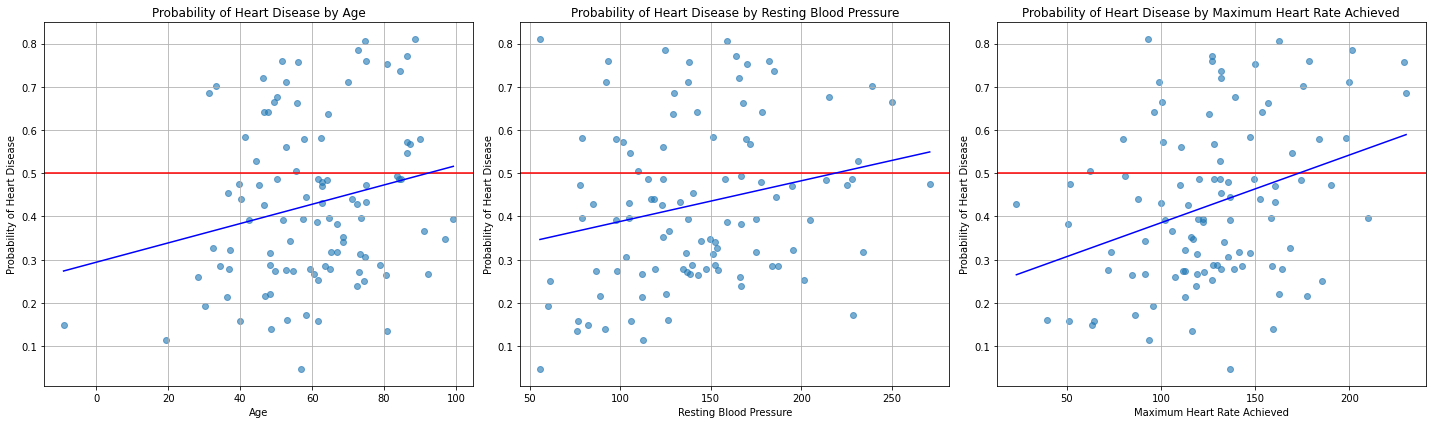

In [246]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# First subplot
x_age = prior_model1['age']
y_prob = prior_model1['combined_heart_disease_prob']
axs[0].scatter(x_age, y_prob, alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')

# Compute regression line
coeffs = np.polyfit(x_age, y_prob, 1)
x_range = np.linspace(x_age.min(), x_age.max(), 100)
axs[0].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')

axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age')
axs[0].grid(True)

# Second subplot
x_bps = prior_model1['bps']
axs[1].scatter(x_bps, y_prob, alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')

# Compute regression line
coeffs = np.polyfit(x_bps, y_prob, 1)
x_range = np.linspace(x_bps.min(), x_bps.max(), 100)
axs[1].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')

axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure')
axs[1].grid(True)

# Third subplot
x_thalach = prior_model1['thalach']
axs[2].scatter(x_thalach, y_prob, alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')

# Compute regression line
coeffs = np.polyfit(x_thalach, y_prob, 1)
x_range = np.linspace(x_thalach.min(), x_thalach.max(), 100)
axs[2].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')

axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

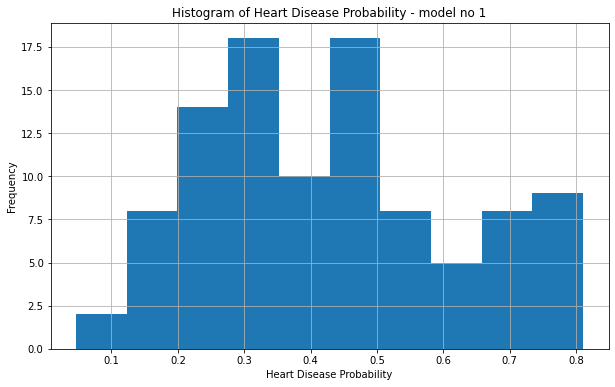

In [247]:
plt.figure(figsize=(10, 6))
plt.hist(prior_model1['combined_heart_disease_prob'])
plt.title('Histogram of Heart Disease Probability - model no 1')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

**Prior model 2**

In [248]:
model2 = CmdStanModel(stan_file='prior_combined2.stan')
sim = model2.sample(iter_sampling=100,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)
prior_model2 = sim.draws_pd()

14:49:03 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

14:49:03 - cmdstanpy - INFO - CmdStan done processing.


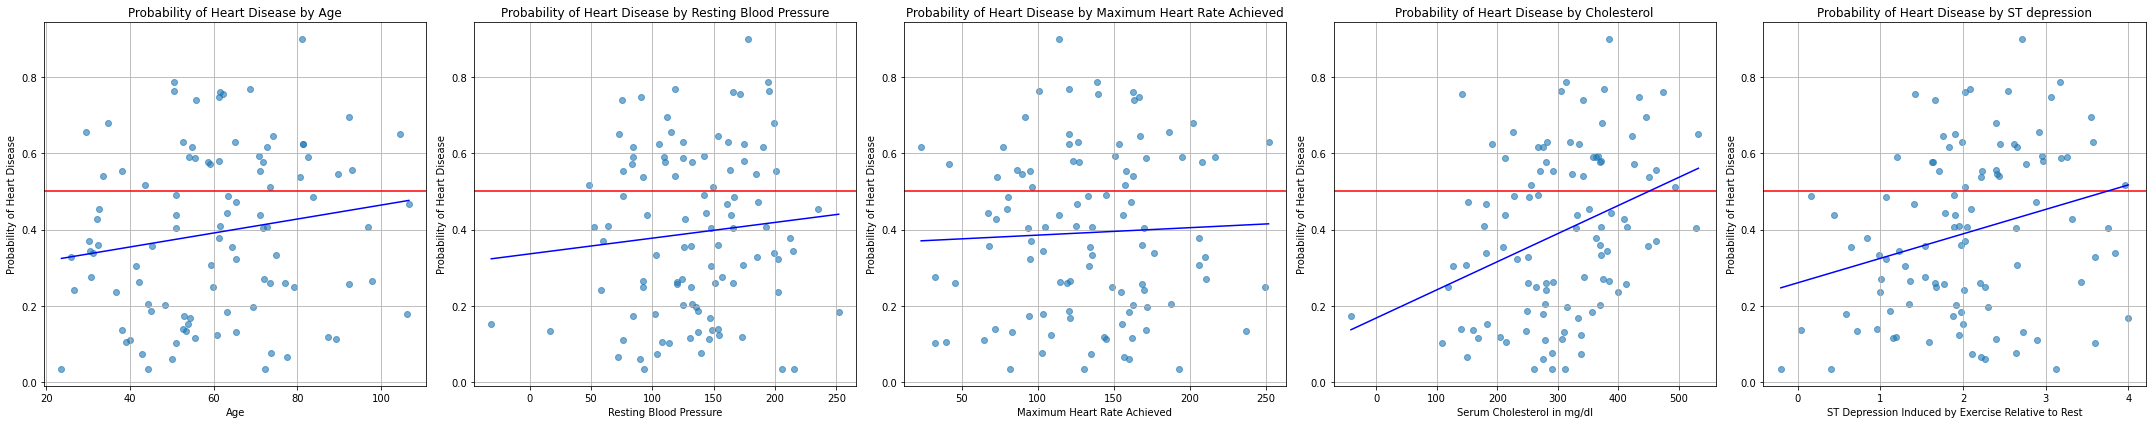

In [249]:
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

# Common y variable
y_prob = prior_model2['combined_heart_disease_prob']

# First subplot
x_age = prior_model2['age']
axs[0].scatter(x_age, y_prob, alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_age, y_prob, 1)
x_range = np.linspace(x_age.min(), x_age.max(), 100)
axs[0].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age')
axs[0].grid(True)

# Second subplot
x_bps = prior_model2['bps']
axs[1].scatter(x_bps, y_prob, alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_bps, y_prob, 1)
x_range = np.linspace(x_bps.min(), x_bps.max(), 100)
axs[1].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure')
axs[1].grid(True)

# Third subplot
x_thalach = prior_model2['thalach']
axs[2].scatter(x_thalach, y_prob, alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_thalach, y_prob, 1)
x_range = np.linspace(x_thalach.min(), x_thalach.max(), 100)
axs[2].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved')
axs[2].grid(True)

# Fourth subplot
x_chol = prior_model2['chol']
axs[3].scatter(x_chol, y_prob, alpha=0.6)
axs[3].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_chol, y_prob, 1)
x_range = np.linspace(x_chol.min(), x_chol.max(), 100)
axs[3].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')
axs[3].set_xlabel('Serum Cholesterol in mg/dl')
axs[3].set_ylabel('Probability of Heart Disease')
axs[3].set_title('Probability of Heart Disease by Cholesterol')
axs[3].grid(True)

# Fifth subplot
x_old_peak = prior_model2['old_peak']
axs[4].scatter(x_old_peak, y_prob, alpha=0.6)
axs[4].axhline(y=0.5, color='red', linestyle='-')
coeffs = np.polyfit(x_old_peak, y_prob, 1)
x_range = np.linspace(x_old_peak.min(), x_old_peak.max(), 100)
axs[4].plot(x_range, np.polyval(coeffs, x_range), color='blue', linestyle='-')
axs[4].set_xlabel('ST Depression Induced by Exercise Relative to Rest')
axs[4].set_ylabel('Probability of Heart Disease')
axs[4].set_title('Probability of Heart Disease by ST depression')
axs[4].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

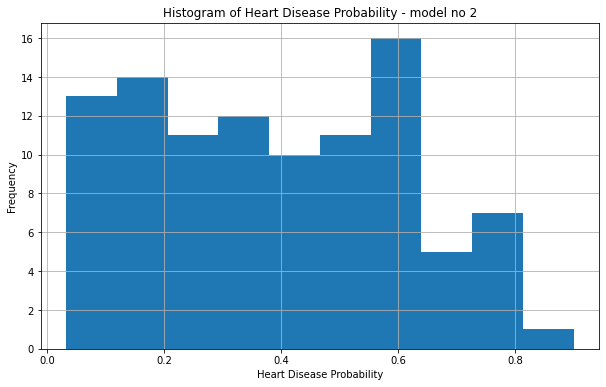

In [250]:
plt.figure(figsize=(10, 6))
plt.hist(prior_model2['combined_heart_disease_prob'])
plt.title('Histogram of Heart Disease Probability - model no 2')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

**Posterior 1**

In [251]:
data = pd.read_csv('heart.csv').dropna()
data1 = data[['age', 'trestbps', 'thalach', 'target']]
data1

,age,trestbps,thalach,target
0,63,145,150,1
1,37,130,187,1
2,41,130,172,1
3,56,120,178,1
4,57,120,163,1
...,...,...,...,...
298,57,140,123,0
299,45,110,132,0
300,68,144,141,0
301,57,130,115,0


In [252]:
posterior1_model = CmdStanModel(stan_file='posterior1.stan')
data_model1 = {'N': len(data1), 'age': data1.iloc[:, 0], 'bps': data1.iloc[:, 1], 'thalach': data1.iloc[:, 2], 'y': data1.iloc[:, 3]}
sim = posterior1_model.sample(data=data_model1,
                        iter_sampling=1000,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)
posterior1 = sim.draws_pd()

14:49:04 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

14:49:06 - cmdstanpy - INFO - CmdStan done processing.


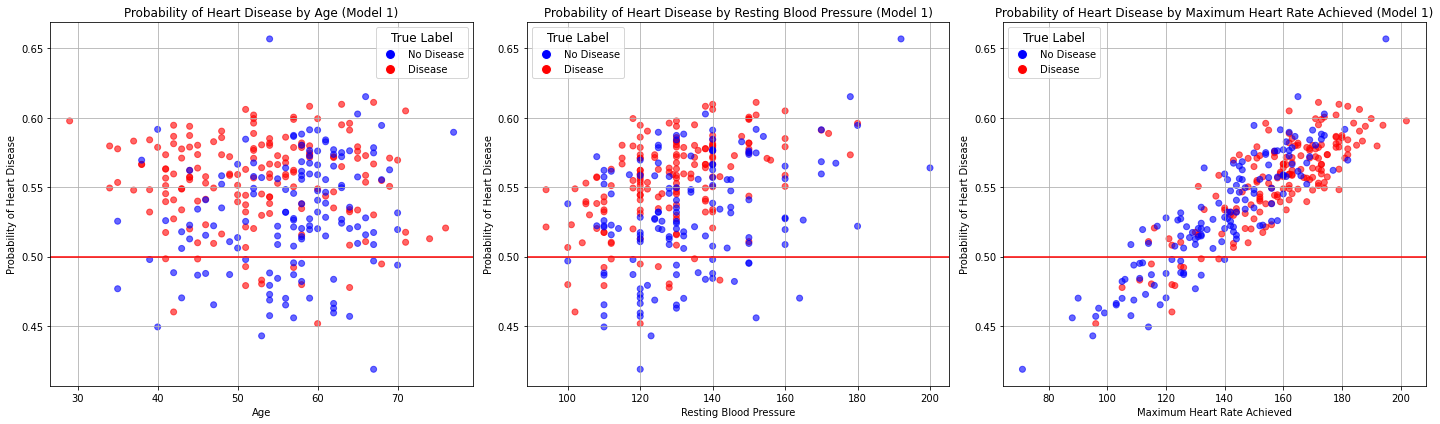

In [253]:
true_labels = data['target'].values

predictions1 = sim.stan_variable('combined_heart_disease_prob').mean(axis=0)

data_model1['y'] = predictions1

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Age vs Probability of Heart Disease
x_age = data_model1['age']
y_prob = data_model1['y']
scatter = axs[0].scatter(x_age, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age (Model 1)')
axs[0].grid(True)
axs[0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Resting Blood Pressure vs Probability of Heart Disease
x_bps = data_model1['bps']
scatter = axs[1].scatter(x_bps, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure (Model 1)')
axs[1].grid(True)
axs[1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Maximum Heart Rate Achieved vs Probability of Heart Disease
x_thalach = data_model1['thalach']
scatter = axs[2].scatter(x_thalach, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved (Model 1)')
axs[2].grid(True)
axs[2].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

plt.tight_layout()
plt.show()

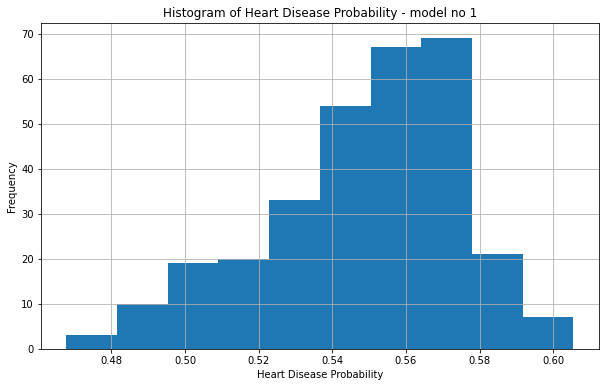

In [254]:
histogram_data = []
for i in range(len(data1)):
    histogram_data.append(posterior1[f"combined_heart_disease_prob[{i + 1}]"][0])
plt.figure(figsize=(10, 6))
plt.hist(histogram_data)
plt.title('Histogram of Heart Disease Probability - model no 1')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

**Posterior 1 - 2nd attempt**


In [255]:
posterior1_model = CmdStanModel(stan_file='posterior1_2nd_try.stan')
data_model1 = {'N': len(data1), 'age': data1.iloc[:, 0], 'bps': data1.iloc[:, 1], 'thalach': data1.iloc[:, 2], 'y': data1.iloc[:, 3]}
sim1 = posterior1_model.sample(data=data_model1,
                        iter_sampling=1000,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)
posterior1 = sim1.draws_pd()

14:49:07 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

14:49:11 - cmdstanpy - INFO - CmdStan done processing.


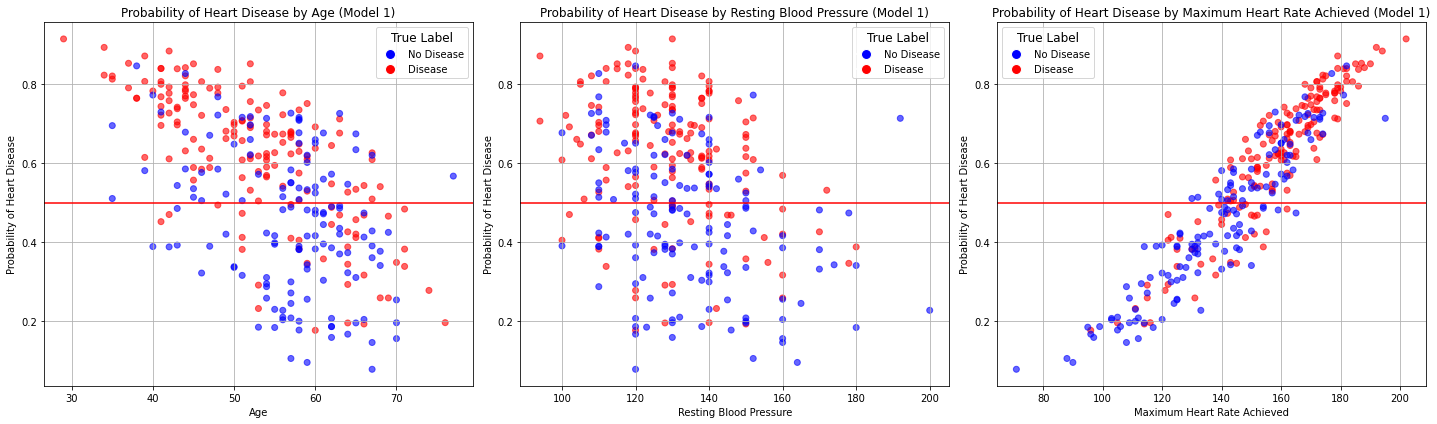

In [256]:
true_labels = data['target'].values

predictions1 = sim1.stan_variable('combined_heart_disease_prob').mean(axis=0)

data_model1['y'] = predictions1

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Age vs Probability of Heart Disease
x_age = data_model1['age']
y_prob = data_model1['y']
scatter = axs[0].scatter(x_age, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age (Model 1)')
axs[0].grid(True)
axs[0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Resting Blood Pressure vs Probability of Heart Disease
x_bps = data_model1['bps']
scatter = axs[1].scatter(x_bps, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure (Model 1)')
axs[1].grid(True)
axs[1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Maximum Heart Rate Achieved vs Probability of Heart Disease
x_thalach = data_model1['thalach']
scatter = axs[2].scatter(x_thalach, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved (Model 1)')
axs[2].grid(True)
axs[2].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

plt.tight_layout()
plt.show()

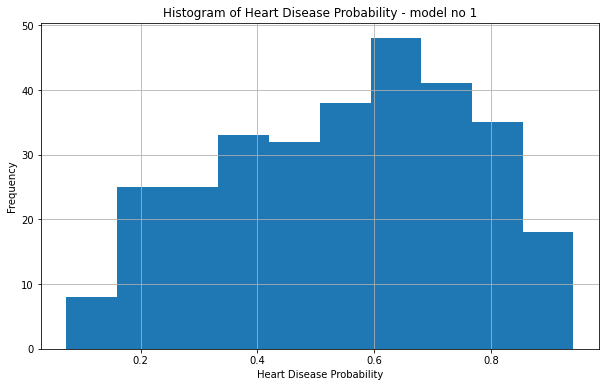

In [257]:
histogram_data = []
for i in range(len(data1)):
    histogram_data.append(posterior1[f"combined_heart_disease_prob[{i + 1}]"][0])
plt.figure(figsize=(10, 6))
plt.hist(histogram_data)
plt.title('Histogram of Heart Disease Probability - model no 1')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

**Posterior 2**

In [258]:
data = pd.read_csv('heart.csv').dropna()
data_model2 = data[['age', 'trestbps', 'thalach', 'chol', 'oldpeak']]
data_model2_dict = {
    'N': len(data_model2),
    'age': data_model2['age'].values,
    'trestbps': data_model2['trestbps'].values,
    'thalach': data_model2['thalach'].values,
    'chol': data_model2['chol'].values,
    'oldpeak': data_model2['oldpeak'].values,
    'y': data['target'].values
}

In [259]:
posterior2_model = CmdStanModel(stan_file='posterior2.stan')
sim2 = posterior2_model.sample(data=data_model2_dict,
                        iter_sampling=1000,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)
posterior2 = sim2.draws_pd()

14:49:12 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

14:49:19 - cmdstanpy - INFO - CmdStan done processing.


**Posterior 2 - quadratic**

In [260]:
data = pd.read_csv('heart.csv').dropna()
data_model2 = data[['age', 'trestbps', 'thalach', 'chol', 'oldpeak']]
data_model2_dict = {
    'N': len(data_model2),
    'age': data_model2['age'].values,
    'trestbps': data_model2['trestbps'].values,
    'thalach': data_model2['thalach'].values,
    'chol': data_model2['chol'].values,
    'oldpeak': data_model2['oldpeak'].values,
    'y': data['target'].values
}

In [261]:
posterior2_model_q = CmdStanModel(stan_file='posterior2_quadratic.stan')
sim2_q = posterior2_model_q.sample(data=data_model2_dict,
                        iter_sampling=1000,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)
posterior2_q = sim2_q.draws_pd()

14:49:19 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

14:50:05 - cmdstanpy - INFO - CmdStan done processing.
14:50:05 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 484 iterations at max treedepth (48.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


/tmp/ipykernel_450/548105732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model2['y'] = predictions2


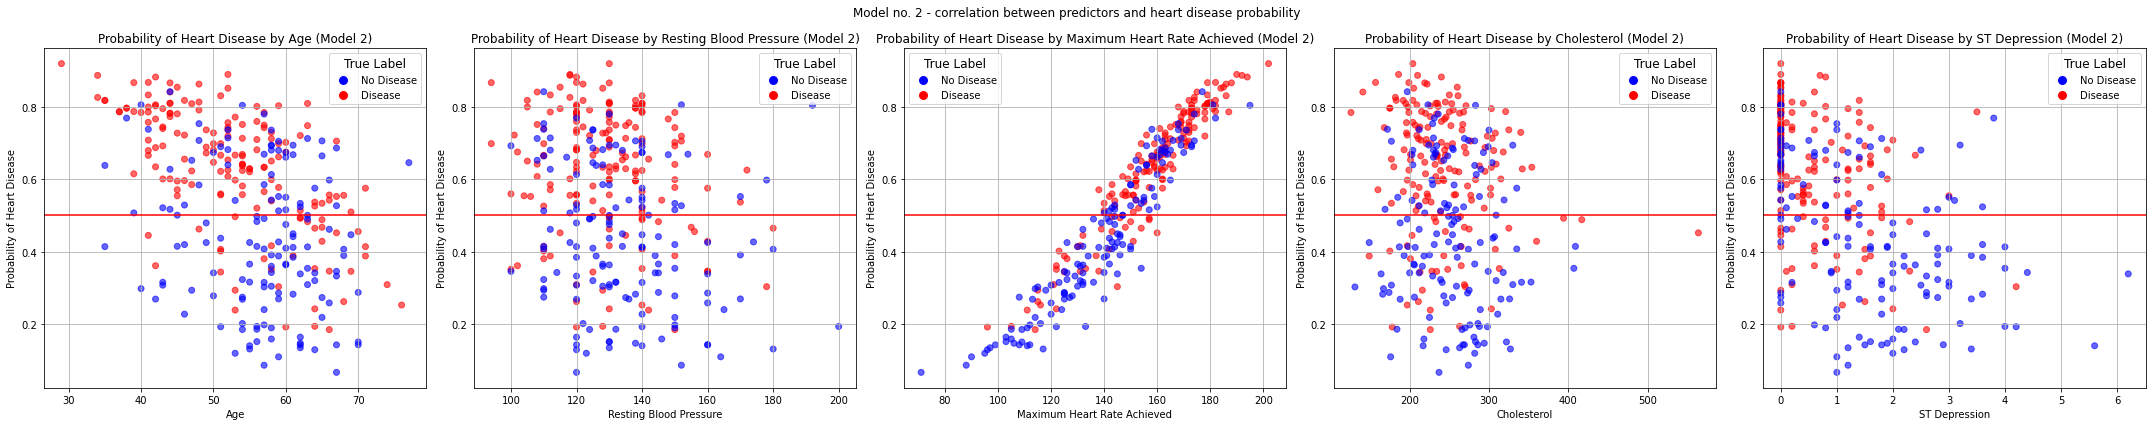

/tmp/ipykernel_450/548105732.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model2['y'] = predictions2_q


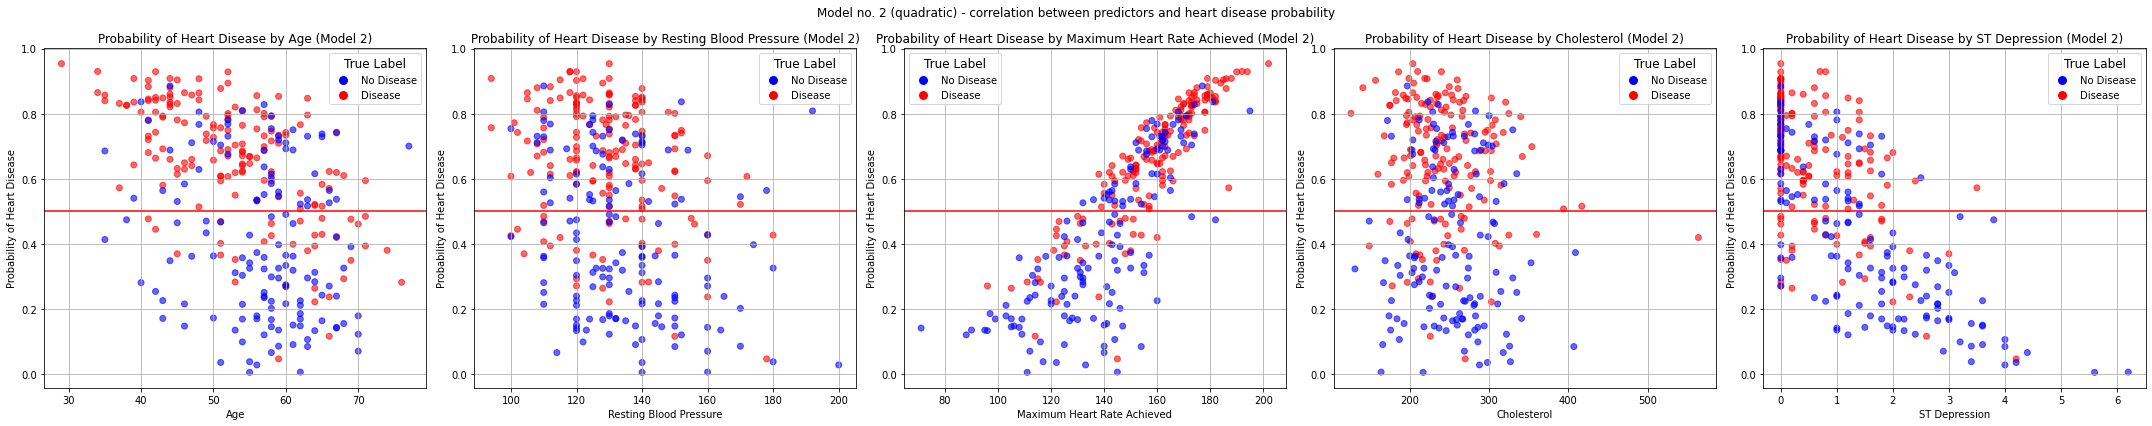

In [262]:
true_labels = data['target'].values

predictions2 = sim2.stan_variable('combined_heart_disease_prob').mean(axis=0)

data_model2['y'] = predictions2

fig, axs = plt.subplots(1, 5, figsize=(30, 6))
fig.suptitle('Model no. 2 - correlation between predictors and heart disease probability')

# Age vs Probability of Heart Disease
x_age = data_model2['age']
y_prob = data_model2['y']
scatter = axs[0].scatter(x_age, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age (Model 2)')
axs[0].grid(True)
axs[0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Resting Blood Pressure vs Probability of Heart Disease
x_bps = data_model2['trestbps']
scatter = axs[1].scatter(x_bps, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure (Model 2)')
axs[1].grid(True)
axs[1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Maximum Heart Rate Achieved vs Probability of Heart Disease
x_thalach = data_model2['thalach']
scatter = axs[2].scatter(x_thalach, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved (Model 2)')
axs[2].grid(True)
axs[2].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Cholesterol vs Probability of Heart Disease
x_chol = data_model2['chol']
scatter = axs[3].scatter(x_chol, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[3].axhline(y=0.5, color='red', linestyle='-')
axs[3].set_xlabel('Cholesterol')
axs[3].set_ylabel('Probability of Heart Disease')
axs[3].set_title('Probability of Heart Disease by Cholesterol (Model 2)')
axs[3].grid(True)
axs[3].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# ST Depression vs Probability of Heart Disease
x_oldpeak = data_model2['oldpeak']
scatter = axs[4].scatter(x_oldpeak, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[4].axhline(y=0.5, color='red', linestyle='-')
axs[4].set_xlabel('ST Depression')
axs[4].set_ylabel('Probability of Heart Disease')
axs[4].set_title('Probability of Heart Disease by ST Depression (Model 2)')
axs[4].grid(True)
axs[4].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

plt.tight_layout()
plt.show()

true_labels = data['target'].values

predictions2_q = sim2_q.stan_variable('combined_heart_disease_prob').mean(axis=0)

data_model2['y'] = predictions2_q

fig, axs = plt.subplots(1, 5, figsize=(30, 6))
fig.suptitle('Model no. 2 (quadratic) - correlation between predictors and heart disease probability')
# Age vs Probability of Heart Disease
x_age = data_model2['age']
y_prob = data_model2['y']
scatter = axs[0].scatter(x_age, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age (Model 2)')
axs[0].grid(True)
axs[0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Resting Blood Pressure vs Probability of Heart Disease
x_bps = data_model2['trestbps']
scatter = axs[1].scatter(x_bps, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure (Model 2)')
axs[1].grid(True)
axs[1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Maximum Heart Rate Achieved vs Probability of Heart Disease
x_thalach = data_model2['thalach']
scatter = axs[2].scatter(x_thalach, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved (Model 2)')
axs[2].grid(True)
axs[2].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# Cholesterol vs Probability of Heart Disease
x_chol = data_model2['chol']
scatter = axs[3].scatter(x_chol, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[3].axhline(y=0.5, color='red', linestyle='-')
axs[3].set_xlabel('Cholesterol')
axs[3].set_ylabel('Probability of Heart Disease')
axs[3].set_title('Probability of Heart Disease by Cholesterol (Model 2)')
axs[3].grid(True)
axs[3].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

# ST Depression vs Probability of Heart Disease
x_oldpeak = data_model2['oldpeak']
scatter = axs[4].scatter(x_oldpeak, y_prob, c=true_labels, cmap='bwr', alpha=0.6)
axs[4].axhline(y=0.5, color='red', linestyle='-')
axs[4].set_xlabel('ST Depression')
axs[4].set_ylabel('Probability of Heart Disease')
axs[4].set_title('Probability of Heart Disease by ST Depression (Model 2)')
axs[4].grid(True)
axs[4].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Disease'),
                       plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Disease')],
             title='True Label', title_fontsize='large')

plt.tight_layout()
plt.show()


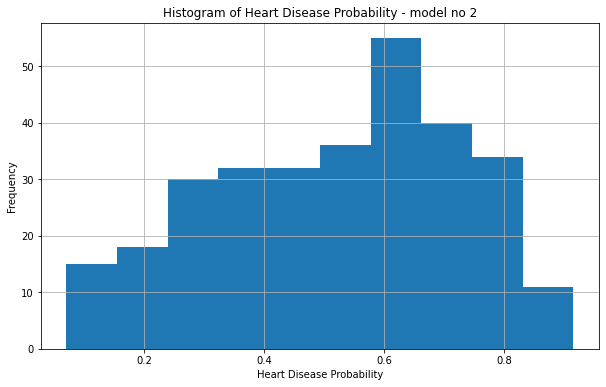

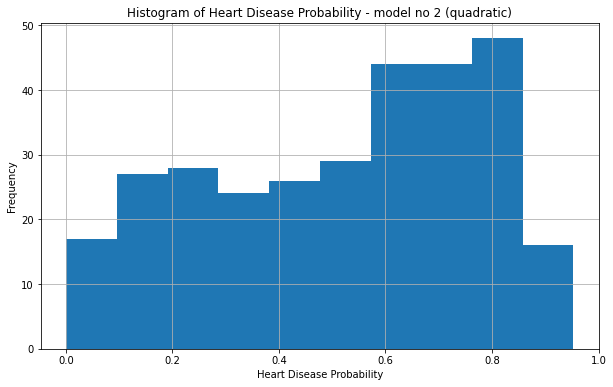

In [263]:
histogram_data = []
for i in range(len(data2)):
    histogram_data.append(posterior2[f"combined_heart_disease_prob[{i + 1}]"][0])
plt.figure(figsize=(10, 6))
plt.hist(histogram_data)
plt.title('Histogram of Heart Disease Probability - model no 2')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

histogram_data = []
for i in range(len(data2)):
    histogram_data.append(posterior2_q[f"combined_heart_disease_prob[{i + 1}]"][0])
plt.figure(figsize=(10, 6))
plt.hist(histogram_data)
plt.title('Histogram of Heart Disease Probability - model no 2 (quadratic)')
plt.xlabel('Heart Disease Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()

**Model comparison**

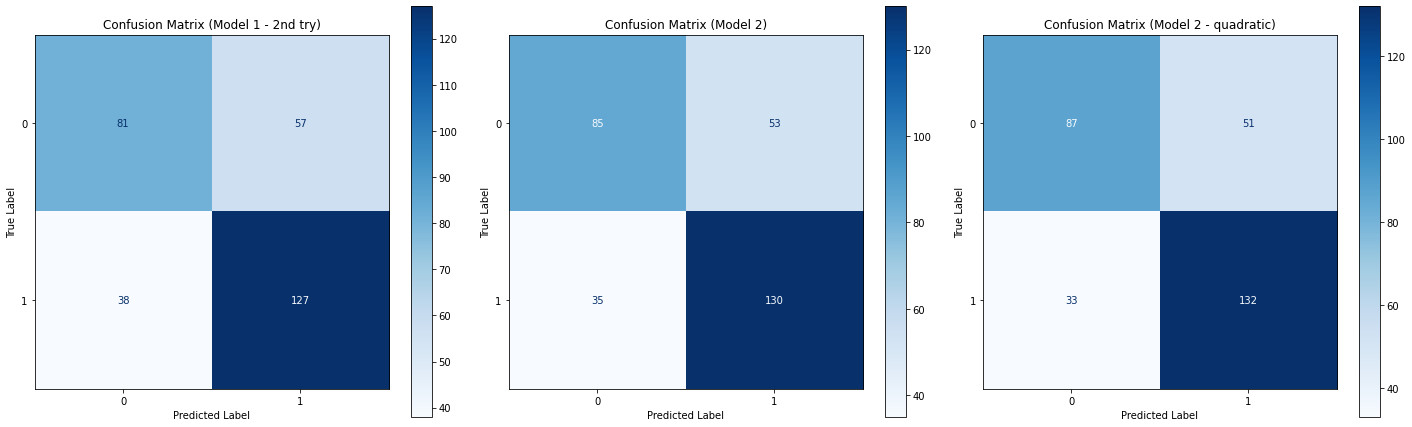

In [264]:
predictions1 = sim1.stan_variable('combined_heart_disease_prob').mean(axis=0)
predictions2 = sim2.stan_variable('combined_heart_disease_prob').mean(axis=0)
predictions2_q = sim2_q.stan_variable('combined_heart_disease_prob').mean(axis=0)

threshold = 0.5
pred_labels1 = (predictions1 > threshold).astype(int)
pred_labels2 = (predictions2 > threshold).astype(int)
pred_labels2_q = (predictions2_q > threshold).astype(int)

cm1 = confusion_matrix(data['target'], pred_labels1)
cm2 = confusion_matrix(data['target'], pred_labels2)
cm2_q = confusion_matrix(data['target'], pred_labels2_q)

# Plot confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Confusion matrix for Model 1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0, 1])
disp1.plot(ax=axs[0], cmap='Blues')
axs[0].set_title('Confusion Matrix (Model 1 - 2nd try)')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

# Confusion matrix for Model 2
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1])
disp2.plot(ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix (Model 2)')
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2_q, display_labels=[0, 1])
disp2.plot(ax=axs[2], cmap='Blues')
axs[2].set_title('Confusion Matrix (Model 2 - quadratic)')
axs[2].set_xlabel('Predicted Label')
axs[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [265]:
predictions = sim.stan_variable('combined_heart_disease_prob').mean(axis=0)
predictions1 = sim1.stan_variable('combined_heart_disease_prob').mean(axis=0)
predictions2 = sim2.stan_variable('combined_heart_disease_prob').mean(axis=0)
predictions2_q = sim2_q.stan_variable('combined_heart_disease_prob').mean(axis=0)

threshold = 0.5
pred_labels = (predictions > threshold).astype(int)
pred_labels1 = (predictions1 > threshold).astype(int)
pred_labels2 = (predictions2 > threshold).astype(int)
pred_labels2_q = (predictions2_q > threshold).astype(int)

accuracy = accuracy_score(data['target'], pred_labels)
accuracy1 = accuracy_score(data['target'], pred_labels1)
accuracy2 = accuracy_score(data['target'], pred_labels2)
accuracy2_q = accuracy_score(data['target'], pred_labels2_q)

print(f"Accuracy for Model 1: {accuracy:.4f}")
print(f"Accuracy for Model 1 (2nd try): {accuracy1:.4f}")
print(f"Accuracy for Model 2: {accuracy2:.4f}")
print(f"Accuracy for Model 2 (quadratic): {accuracy2_q:.4f}")

Accuracy for Model 1: 0.6139
Accuracy for Model 1 (2nd try): 0.6865
Accuracy for Model 2: 0.7096
Accuracy for Model 2 (quadratic): 0.7228


In [266]:
print(classification_report(data['target'], pred_labels1))
print(classification_report(data['target'], pred_labels2_q))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       138
           1       0.69      0.77      0.73       165

    accuracy                           0.69       303
   macro avg       0.69      0.68      0.68       303
weighted avg       0.69      0.69      0.68       303

              precision    recall  f1-score   support

           0       0.72      0.63      0.67       138
           1       0.72      0.80      0.76       165

    accuracy                           0.72       303
   macro avg       0.72      0.72      0.72       303
weighted avg       0.72      0.72      0.72       303



In binary classification, recall of the positive class is also known as “sensitivity” (probability of a positive test given that the patient has the disease); recall of the negative class is “specificity” (probability of a negative test given that the patient is well). The chance of detecting a heart disease for people that indeed have a heart disease is equal to 77% for 3 predictors models and equal to 80% for 5 predictors model.

In [267]:
info = az.from_cmdstanpy(posterior=sim, log_likelihood='log_lik')
info1 = az.from_cmdstanpy(posterior=sim1, log_likelihood='log_lik')
info2 = az.from_cmdstanpy(posterior=sim2, log_likelihood='log_lik')
info2_q = az.from_cmdstanpy(posterior=sim2_q, log_likelihood='log_lik')
compare_dict = {'model1': info, 'model1 - 2nd try': info1, 'model2': info2, 'model2 - quadratic': info2_q}

In [268]:
waic_compare = az.compare(compare_dict, ic='waic')
waic_compare.head()

/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
model2 - quadratic,0,-167.855992,5.178563,0.000000,9.789605e-01,8.103072,0.000000,True,log
model2,1,-175.455673,4.083666,7.599682,1.912224e-15,6.628463,3.449390,False,log
model1 - 2nd try,2,-180.413250,2.770534,12.557259,2.526893e-15,6.330400,4.410677,False,log
model1,3,-203.584828,1.177532,35.728836,2.103947e-02,1.959347,7.406591,False,log


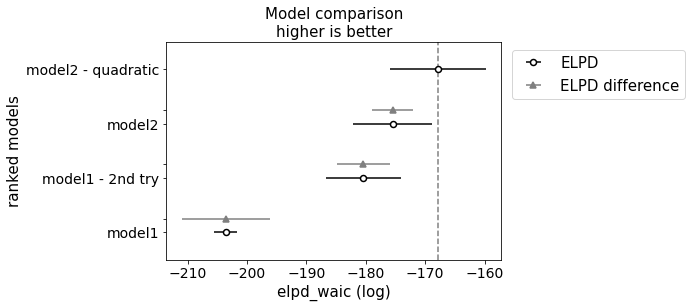

In [269]:
az.plot_compare(waic_compare)
plt.show()

In [270]:
loo_compare = az.compare(compare_dict, ic='loo')
loo_compare.head()

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model2 - quadratic,0,-167.892332,5.214903,0.000000,0.978815,8.104979,0.000000,False,log
model2,1,-175.480413,4.108406,7.588080,0.000000,6.629636,3.449560,False,log
model1 - 2nd try,2,-180.428664,2.785948,12.536332,0.000000,6.331246,4.412797,False,log
model1,3,-203.591561,1.184265,35.699229,0.021185,1.959457,7.408680,False,log


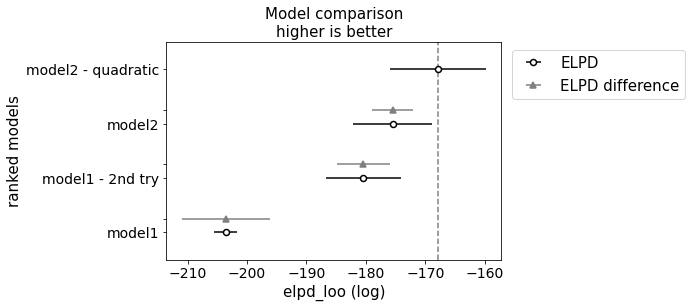

In [271]:
az.plot_compare(loo_compare)
plt.show()

The results given by both methos are similar. The winner in both cases in model no. 2 with five predictors, however the difference is not major. No warning has occurred.